# Alignment (Exploratory)
This notebook looks at the differences between a train and test set, specifically the NC17_EvalPart1 (train) and MFC18_EvalPart1 (test) datasets. Insights from this exploratory analysis will hopefully give us a better sense of how we can use sample-based explanations to help us fix the domain mismatch between these two datasets, and bring them into closer "alignment" with one another.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts
sys.path.insert(0, os.getcwd() + '/../../')  # for util

from scripts.alignment_explore1 import feature_similarity, feature_clustering
from scripts.alignment_explore2 import ablation
from scripts.alignment_explore3 import impact_vs_weight
from scripts.alignment_explore4 import train_vs_test
from scripts.alignment_explore5 import misclassification
from scripts.alignment_explore6 import prediction_explanation
data_dir = '../../data'

/Users/Jonny/Documents/research/interpretability/classification/trees/myenv/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Idenitfying Domain Mismatch
### Feature Similarity
This section analyzes the similarity of data points between the train and test sets, specifically looking at the extracted feature representations and using a kernel to measure the similarity between points.

model (LGBMClassifier)
train set acc: 1.000000
missed train instances (0)
train log loss: 0.02060
model (LGBMClassifier)
test set acc: 0.817634
missed test instances (3177)
test log loss: 0.58381

test and train similarity: 0.301
manip test and train similarity: 0.282
nonmanip test and train similarity: 0.306
manip test and manip train similarity: 0.182
manip test and nonmanip train similarity: 0.342
nonmanip test and manip train similarity: 0.132
nonmanip test and nonmanip train similarity: 0.409


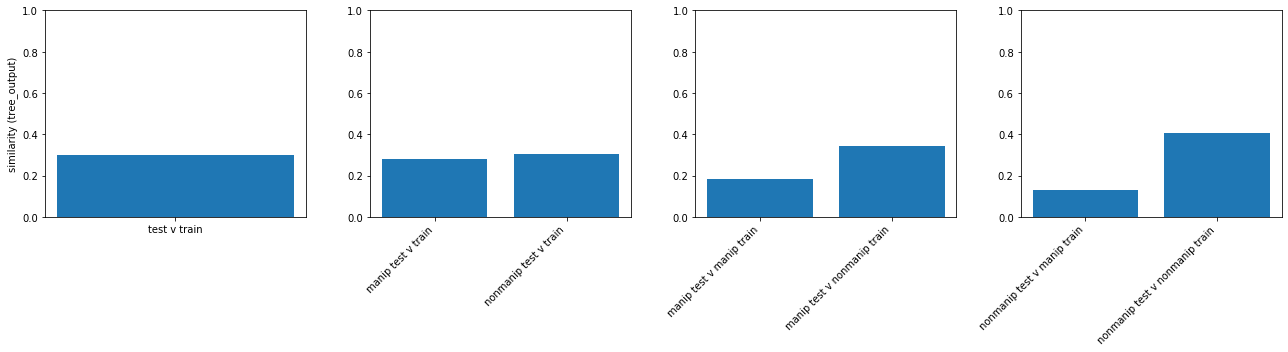

In [8]:
feature_similarity(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1,
                   test_subset=20000, agg_type='mean', data_dir=data_dir, verbose=False)

### Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
embedding with tsne...


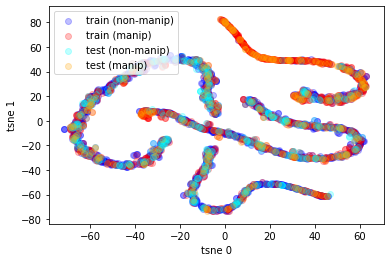

In [3]:
feature_clustering(model='lgb', encoding='none', dataset='medifor1a', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01417
train auroc: 1.000
test set acc: 0.925828
test log loss: 0.20638
test auroc: 0.974
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


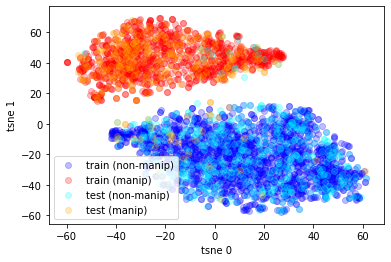

In [3]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor1a', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.969934
train log loss: 0.10119
train auroc: 0.995
test set acc: 0.924247
test log loss: 0.18653
test auroc: 0.960
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


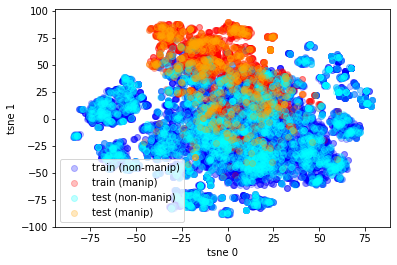

In [4]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor1b', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711
concatenating X_train and X_test...
exracting tree features...
reducing dimensionality from 100 to 50 with PCA...
embedding with tsne...


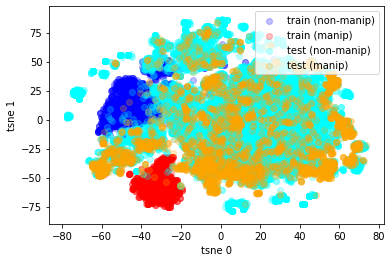

In [5]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor', random_state=1, verbose=0, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.962402
train log loss: 0.11079
train auroc: 0.993
test set acc: 0.587970
test log loss: 0.75583
test auroc: 0.787
concatenating X_train and X_test...
exracting tree features...
reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 21195 samples in 0.055s...
[t-SNE] Computed neighbors for 21195 samples in 32.597s...
[t-SNE] Computed conditional probabilities for sample 1000 / 21195
[t-SNE] Computed conditional probabilities for sample 2000 / 21195
[t-SNE] Computed conditional probabilities for sample 3000 / 21195
[t-SNE] Computed conditional probabilities for sample 4000 / 21195
[t-SNE] Computed conditional probabilities for sample 5000 / 21195
[t-SNE] Computed conditional probabilities for sample 6000 / 21195
[t-SNE] Computed conditional probabilities for sample 7000 / 21195
[t-SNE] Computed conditional probabilities for sample 8000 / 21195
[t-SNE] Computed conditional prob

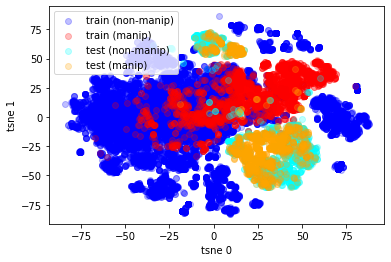

In [3]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor1_switch', random_state=1, verbose=1, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.885494
train log loss: 0.27603
train auroc: 0.959
test set acc: 0.855519
test log loss: 0.34110
test auroc: 0.900
concatenating X_train and X_test...
exracting tree features...
reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35490 samples in 0.107s...
[t-SNE] Computed neighbors for 35490 samples in 105.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35490
[t-SNE] Computed conditional probabilities for sample 2000 / 35490
[t-SNE] Computed conditional probabilities for sample 3000 / 35490
[t-SNE] Computed conditional probabilities for sample 4000 / 35490
[t-SNE] Computed conditional probabilities for sample 5000 / 35490
[t-SNE] Computed conditional probabilities for sample 6000 / 35490
[t-SNE] Computed conditional probabilities for sample 7000 / 35490
[t-SNE] Computed conditional probabilities for sample 8000 / 35490
[t-SNE] Computed conditional pro

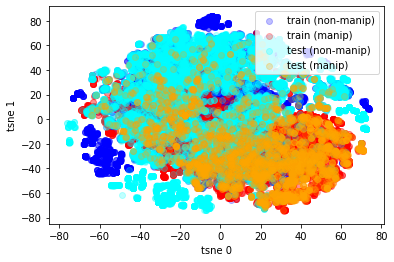

In [2]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor2', random_state=1, verbose=2, data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.943229
train log loss: 0.14990
train auroc: 0.980
test set acc: 0.768000
test log loss: 0.58586
test auroc: 0.854
concatenating X_train and X_test...
exracting tree features...
reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35490 samples in 0.174s...
[t-SNE] Computed neighbors for 35490 samples in 113.810s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35490
[t-SNE] Computed conditional probabilities for sample 2000 / 35490
[t-SNE] Computed conditional probabilities for sample 3000 / 35490
[t-SNE] Computed conditional probabilities for sample 4000 / 35490
[t-SNE] Computed conditional probabilities for sample 5000 / 35490
[t-SNE] Computed conditional probabilities for sample 6000 / 35490
[t-SNE] Computed conditional probabilities for sample 7000 / 35490
[t-SNE] Computed conditional probabilities for sample 8000 / 35490
[t-SNE] Computed conditional pro

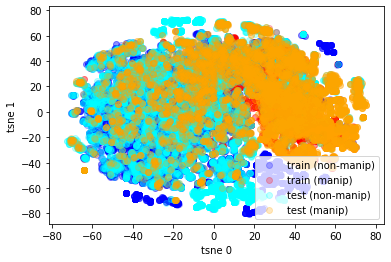

In [2]:
feature_clustering(model='lgb', encoding='tree_output', dataset='medifor2_switch', random_state=1, verbose=1, data_dir=data_dir)

## Understanding Missclassified Test Instances
This section looks at the most impactful train instances for a subset of test instances. Specifically, we'll look at a group of wrongly predicted test instances, and the train instances that were most responsible for their classification.

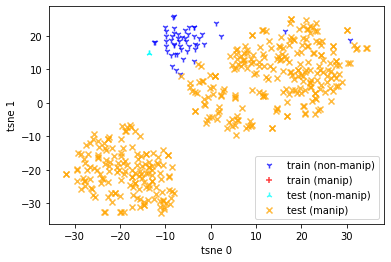

In [2]:
misclassification(model='lgb', encoding='tree_output', dataset='medifor1', random_state=1, test_subset=400, train_subset=50, data_dir=data_dir)

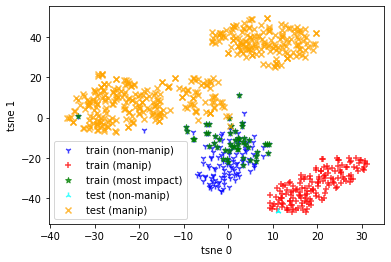

In [2]:
misclassification(model='lgb', encoding='tree_output', dataset='medifor1', random_state=1, test_subset=400, train_subset=50,
                  data_dir=data_dir, plot_all_sv=True)

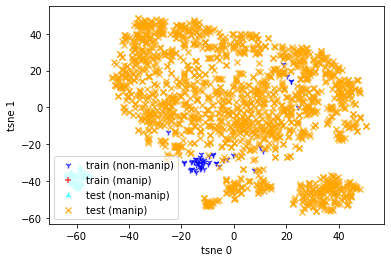

In [3]:
misclassification(model='lgb', encoding='tree_output', dataset='medifor1', random_state=1, test_subset=1700, train_subset=50, data_dir=data_dir)

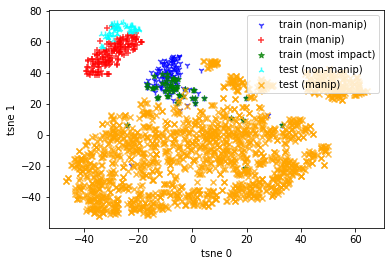

In [3]:
misclassification(model='lgb', encoding='tree_output', dataset='medifor1', random_state=1, test_subset=1700, train_subset=50,
                  data_dir=data_dir, plot_all_sv=True)

## Explanations for Test Instances
This looks at sample-based explanations for individual test predictions. We show the raw images for the test instance, and the raw images for the most impactful positive and negative train instances, overlaid with their manipulation masks, if any.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.01148
train auroc: 1.000
test set acc: 0.903246
test log loss: 0.30004
test auroc: 0.922


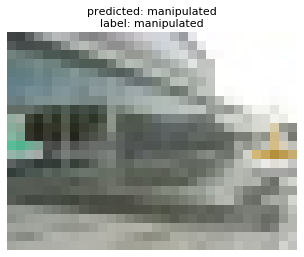

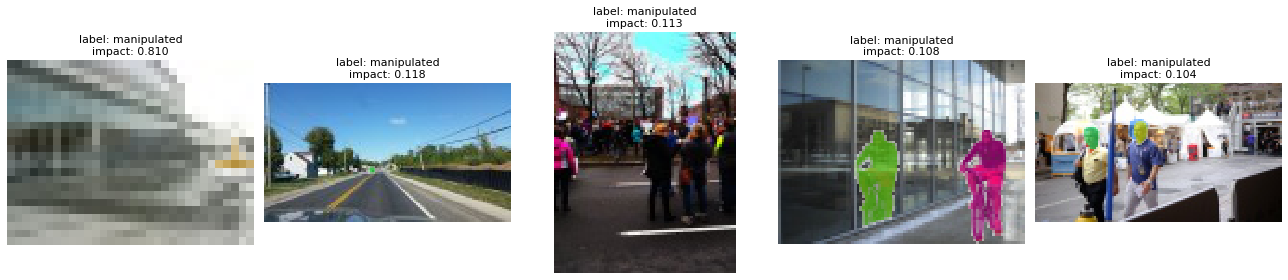

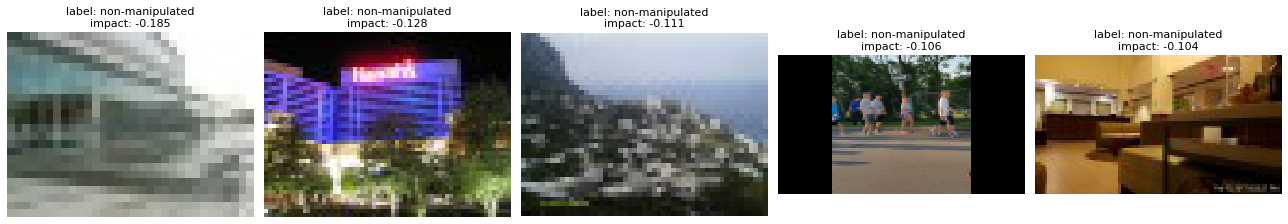

In [18]:
prediction_explanation(model='lgb', encoding='tree_path', dataset='medifor1b', random_state=28, topk_train=5, test_size=0.9, alpha=0.5,
                       data_dir=data_dir)

model (LGBMClassifier)
train set acc: 0.986653
train log loss: 0.06823
train auroc: 0.999
test set acc: 0.926624
test log loss: 0.18774
test auroc: 0.958


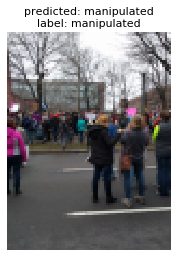

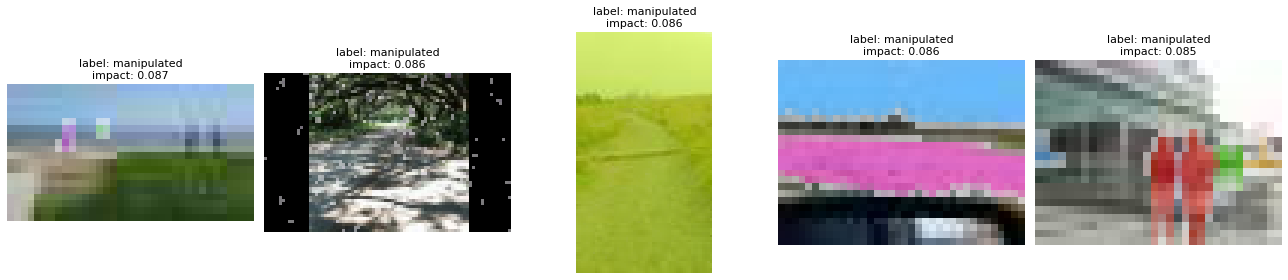

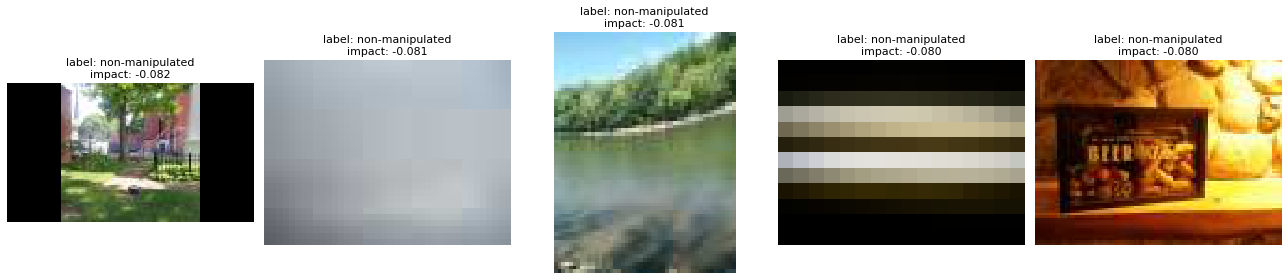

In [47]:
prediction_explanation(model='lgb', encoding='tree_output', dataset='medifor1b', random_state=110, topk_train=5, test_size=0.6, alpha=0.5,
                       data_dir=data_dir)

## Feature Ablation
This section analyzes the effect of removing various features from the training data. We greedily remove features one at a time that have the biggest impact on the test set.

100%|██████████| 36/36 [00:22<00:00,  1.18it/s]


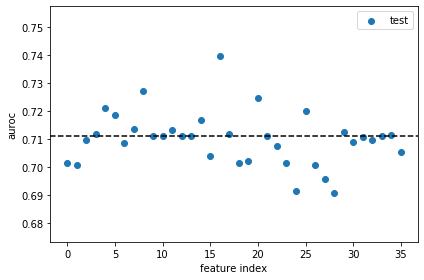

auroc before removal: 0.711 (test), 1.000 (train)
auroc after removal: 0.740 (test)
removed feature: p_fibberinh_1_0_mediforsystem, index: 16, original index: 16


100%|██████████| 35/35 [00:19<00:00,  1.81it/s]


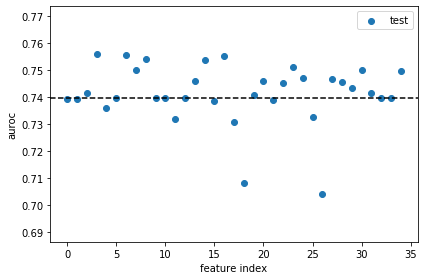

auroc before removal: 0.740 (test), 1.000 (train)
auroc after removal: 0.756 (test)
removed feature: combo01_baseline_ta1, index: 3, original index: 4


100%|██████████| 34/34 [00:16<00:00,  2.11it/s]


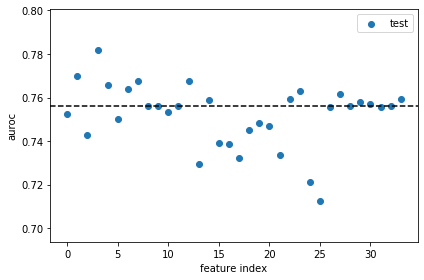

auroc before removal: 0.756 (test), 1.000 (train)
auroc after removal: 0.782 (test)
removed feature: copymove01_baseline_ta1, index: 3, original index: 5


100%|██████████| 33/33 [00:16<00:00,  2.00it/s]


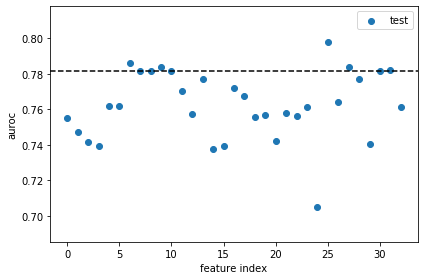

auroc before removal: 0.782 (test), 1.000 (train)
auroc after removal: 0.798 (test)
removed feature: p_ucrlstmwresamplingwcmm2_1_0_mediforsystem, index: 25, original index: 28


100%|██████████| 32/32 [00:15<00:00,  2.16it/s]


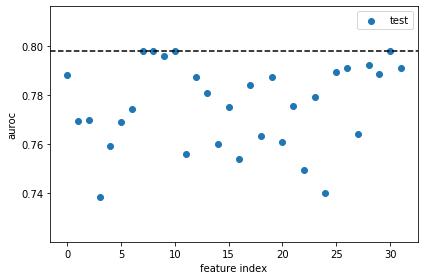

features removed: [16, 4, 5, 28]


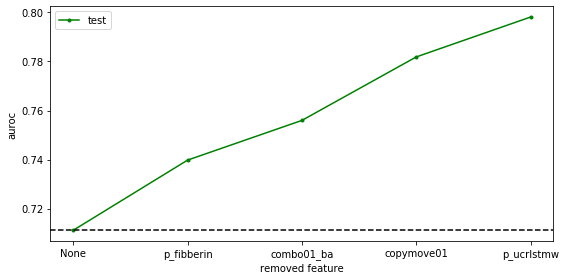

In [2]:
ablation(model='lgb', dataset='medifor', n_estimators=100, random_state=1, plot=True, data_dir=data_dir)

## Train Impact vs Train Coefficients
This section anaylzes the correlation between support vector weights against the overall impact that the support vectors have on a given set of test instances.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711


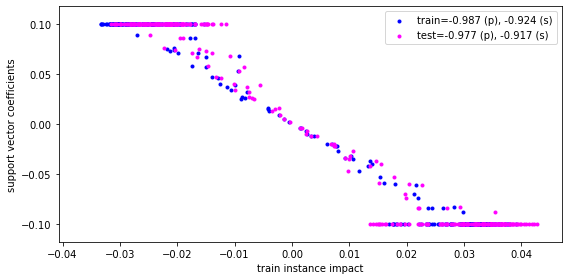

In [4]:
impact_vs_weight(model='lgb', encoding='tree_output', dataset='medifor', n_estimators=100, random_state=1, plot=True, data_dir=data_dir)

## Differentiating between train and test instances
This section learns a classifier to predict whether a test instance came from the train or test set. We then look at the most important features for this classifier on the test set using SHAP values.

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00001
train auroc: 1.000
test set acc: 1.000000
test log loss: 0.00001
test auroc: 1.000


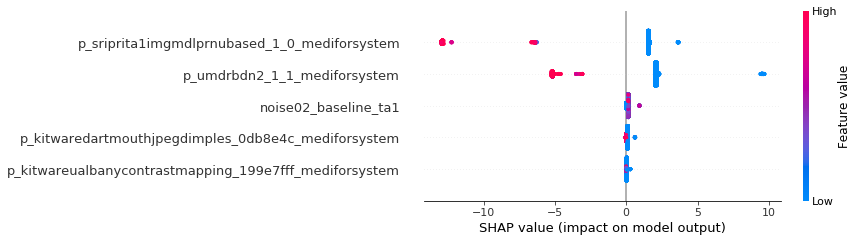

In [3]:
train_vs_test(model='lgb', dataset='medifor', n_estimators=100, random_state=1, test_size=0.5, data_dir=data_dir, n_features=5)

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00001
train auroc: 1.000
test set acc: 1.000000
test log loss: 0.00001
test auroc: 1.000


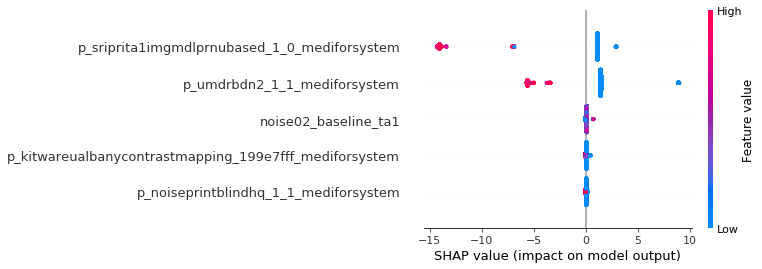

In [4]:
train_vs_test(model='lgb', dataset='medifor', n_estimators=100, random_state=1, test_size=0.5, data_dir=data_dir, train_subset='negative')

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00001
train auroc: 1.000
test set acc: 1.000000
test log loss: 0.00001
test auroc: 1.000


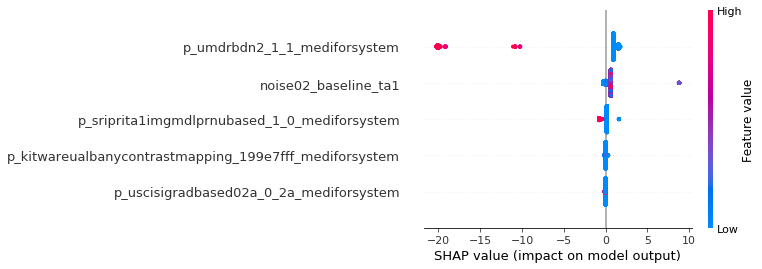

In [3]:
train_vs_test(model='lgb', dataset='medifor', n_estimators=100, random_state=1, test_size=0.5, data_dir=data_dir, train_subset='positive')